In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

In [5]:
USArrests = sm.datasets.get_rdataset("USArrests", 'datasets')

In [6]:
USArrests

<class 'statsmodels.datasets.utils.Dataset'>

In [7]:
USArrests.data

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [8]:
datos = USArrests.data

In [9]:
print(USArrests.__doc__)

.. container::

   .. container::

      ========= ===============
      USArrests R Documentation
      ========= ===============

      .. rubric:: Violent Crime Rates by US State
         :name: violent-crime-rates-by-us-state

      .. rubric:: Description
         :name: description

      This data set contains statistics, in arrests per 100,000
      residents for assault, murder, and rape in each of the 50 US
      states in 1973. Also given is the percent of the population living
      in urban areas.

      .. rubric:: Usage
         :name: usage

      .. code:: R

         USArrests

      .. rubric:: Format
         :name: format

      A data frame with 50 observations on 4 variables.

      ==== ============ ======= =============================
      [,1] ``Murder``   numeric Murder arrests (per 100,000)
      [,2] ``Assault``  numeric Assault arrests (per 100,000)
      [,3] ``UrbanPop`` numeric Percent urban population
      [,4] ``Rape``     numeric Rape arrests (per

In [10]:
datos.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5


In [11]:
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)

datos_scaled =pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)

datos_scaled.head(4)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794


In [13]:
datos_scaled.describe().round(2)

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,-0.00,0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01
min,-1.62,-1.52,-2.34,-1.50
25%,-0.86,-0.75,-0.77,-0.66
50%,-0.12,-0.14,0.03,-0.12
75%,0.80,0.95,0.85,0.53
max,2.23,2.02,1.78,2.67


In [16]:
distancias = pairwise_distances(X=datos_scaled, metric='cosine')

distancias = pd.DataFrame(distancias, columns=datos.index, index=datos.index)

distancias.head(4)

rownames,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
rownames,,,,,,,,,,,,,,,,,,,,,
Alabama,0.000000,0.549507,0.775744,4.193307e-01,0.912275,1.033912,1.787623,1.075262,0.326270,0.091083,...,1.352868,0.152677,0.537765,1.934310,1.306792,0.669977,1.864301,1.121850,1.772885,1.145892
Alaska,0.549507,0.000000,0.511214,6.463511e-01,0.499620,0.360098,1.894914,1.369572,0.489233,0.529282,...,1.321975,0.343824,0.816381,1.413184,1.219897,1.045242,1.025387,1.311893,1.763161,1.557467
Arizona,0.775744,0.511214,0.000000,1.385628e+00,0.067224,0.215199,1.391051,0.586284,0.168554,0.793931,...,1.875901,0.810819,0.374226,0.936677,1.857698,1.772244,0.775731,1.916786,1.740431,1.765619
Arkansas,0.419331,0.646351,1.385628,1.110223e-16,1.559701,1.491906,1.504963,1.214706,1.122096,0.645403,...,0.496074,0.575262,1.441332,1.827138,0.440041,0.432330,1.687368,0.357975,1.175628,0.486402


In [21]:
distancias = pairwise_distances(X=datos_scaled, metric='euclidean')

distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(distancias, columns=datos.index, index=datos.index)

distancias

rownames,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
rownames,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,2.731204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,2.316805,2.728061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,1.302905,2.854730,2.745350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.296239,3.043126,1.323789,3.801851,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,2.677982,2.350139,1.378889,2.859794,1.300691,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.247941,4.788035,3.295984,2.634114,4.107674,3.361780,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,2.039794,3.658129,1.928755,1.818602,3.104992,2.580683,1.774684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.321467,3.027189,1.767154,3.406433,2.045563,2.470692,4.515453,3.092498,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
distancias.melt(ignore_index=False, var_name='estado_b', value_name='distancia') \
    .rename_axis('estado_a') \
    .reset_index() \
    .dropna() \
    .sort_values(by ='distancia') \
    .head()

,estado_a,estado_b,distancia
728,New Hampshire,Iowa,0.207944
631,New York,Illinois,0.353774
665,Kansas,Indiana,0.433124
1148,Wisconsin,Minnesota,0.499099
928,New Hampshire,Maine,0.504669


In [23]:
distancias.melt(ignore_index=False, var_name='estado_b', value_name='distancia') \
    .rename_axis('estado_a') \
    .reset_index() \
    .dropna() \
    .sort_values(by ='distancia') \
    .tail()

,estado_a,estado_b,distancia
244,Vermont,California,6.093594
433,North Dakota,Florida,6.096939
1394,Vermont,Nevada,6.105144
1383,North Dakota,Nevada,6.113387
444,Vermont,Florida,6.138335


In [25]:
d_to_plot = distancias.melt(ignore_index=False, var_name='estado_b', value_name='distancia') \
    .rename_axis('estado_a') \
    .reset_index() \
    .dropna() \
    .sort_values(by ='distancia') \
    .reset_index(drop=True)

In [26]:
d_to_plot

,estado_a,estado_b,distancia
0,New Hampshire,Iowa,0.207944
1,New York,Illinois,0.353774
2,Kansas,Indiana,0.433124
3,Wisconsin,Minnesota,0.499099
4,New Hampshire,Maine,0.504669
...,...,...,...
1220,Vermont,California,6.093594
1221,North Dakota,Florida,6.096939
1222,Vermont,Nevada,6.105144
1223,North Dakota,Nevada,6.113387


In [28]:
datos.loc[['Vermont','Florida']].transpose()

rownames,Vermont,Florida
Murder,2.2,15.4
Assault,48.0,335.0
UrbanPop,32.0,80.0
Rape,11.2,31.9


In [24]:
import matplotlib.pyplot as plt

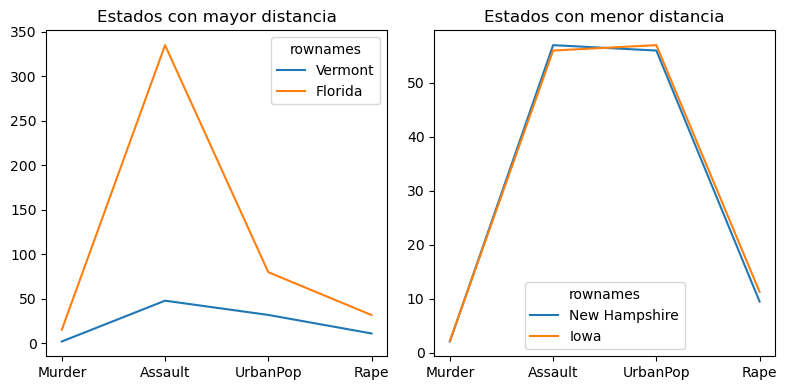

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

datos.loc[['Vermont','Florida']].transpose().plot(ax = axs[0])
axs[0].set_title('Estados con mayor distancia')

datos.loc[['New Hampshire','Iowa']].transpose().plot(ax = axs[1])
axs[1].set_title('Estados con menor distancia')

plt.tight_layout()
plt.show()